# Project Proposal 

#### Zach Johnson
#### ECON411
#### North Dakota State University 

The goal of this project is to provide an introductory program that will provide technical analysis for asset traders. 
Technical analysis is- from Wikipedia -" an analysis methodology for forecasting the direction of prices through the study of past market data, primarily price and volume." There are countless programs that have attempted to do this, many of them successful. 

The personal benefit I will derive from this project is a deeper understanding of trading markets, algorithmic trading techniques, and use of Python for financial services( and Python in general). 

My original plan when deciding to do this project was to eventually incorporate multiple linear regression models, associating the change in one stock variable( volume, daily price change, monthly price change, derivative of price change, etc. ) with the future price of a stock, in order to predict when a stock would rise in value. 
As it currently stands, I have only a vague idea of how I might go about using Python to make this model, and I hope you, the reader of this notebook, will follow along and grow with me as I learn new techniques and strategies that could one day lead to my model being successful. 

In addition to not having a completely clear path forward from a software development perspective, I do not have good insights into what 'trading strategies' are most commonly used. I have personally traded stocks before, but mostly from a play-it-safe mindset, meant to offset increases in inflation, by investing almost exclusively in the S&P 500. Other than that, my investments have basically been gambling with other teenagers with under-developed pre-frontal cortexes, leading to very risky and unwise decisions. Luckily I did not have much money to lose when I would 'trade' without a strategy going in. In researching and creating this model, I hope to gain insights about the trends of the market and various trading strategies that might allow me to make more sophisticated investment decisions. 

My first order of business will be to figure out how to get data to use for my model. Online resources recommend Yahoo Finance, 
Google Finance, and Quandl, among others. 

###### A stroke of luck has just beset me - in class today(9/28), we went over how to use pandas datareader to pull stock data directly from yahoo. And it is suprisingly simple. 

### First, we must import the libraries that will allow us to gather and manipulate the data we need. 

   ######        pandas - 'a fast, powerful, flexible and easy to use open source data analysis and manipulation tool' (pandas website)- this will allow us to use dataframes to structure our stock data, which make data super easy to look at and manipulate 

   ######    pandas datareader - will allow us to pull data from the web , specifically stock market data from yahoo! finance 

   ######        datetime - a python library that reads date and time formats, needed to specify date ranges 

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime

datetime lets us traverse dates and get precise time intervals from one date to another. For example, here is how long it has been since the beginning of 2012: 

In [2]:
start = datetime.datetime(2012, 1 , 1)
end = datetime.datetime.today()
print(end - start)

3559 days, 13:20:46.028779


Next, we will use the techniques I learned in class to access data from yahoo finance. 

The pandas datareader library has a built in 'yahoo' argument. It allows us to pass the name of our desired stock, the source of the data - 'yahoo' - and a range of dates to pull from start to end. As an example, here is how we would fetch stock data from yahoo for the S&P500 using pandas datareader: 

In [3]:
sp500 = web.DataReader( '^GSPC', 'yahoo', start, end)
sp500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,1284.619995,1258.859985,1258.859985,1277.060059,3943710000,1277.060059
2012-01-04,1278.729980,1268.099976,1277.030029,1277.300049,3592580000,1277.300049
2012-01-05,1283.050049,1265.260010,1277.300049,1281.060059,4315950000,1281.060059
2012-01-06,1281.839966,1273.339966,1280.930054,1277.810059,3656830000,1277.810059
2012-01-09,1281.989990,1274.550049,1277.829956,1280.699951,3371600000,1280.699951
...,...,...,...,...,...,...
2021-09-23,4465.399902,4406.750000,4406.750000,4448.979980,2833290000,4448.979980
2021-09-24,4463.120117,4430.270020,4438.040039,4455.479980,2772090000,4455.479980
2021-09-27,4457.299805,4436.189941,4442.120117,4443.109863,3032870000,4443.109863


This is super powerful for how simple it is. As we can see, with a single line of code we can retrieve the high, low, open, close, volume, and adjusted close for any stock on yahoo finance. The data is perfectly up-to-date and we don't have to pay for it. 

Eventually, this tool will be what we use to get data to train our regression model.

### Some visualizations of stock data

Pandas allows for us to easily visualize data that we have made a dataframe. Say that we wanted to visually compare the price changes between a few stocks. This is made easy using Pandas, Matplotlib, and pandas datareader. Although the look and shape of the graph is not relevant for a computer to create a regression predition model, it can be useful to help us humans intuit when, how, and why a stock price changed when it did. Our first order of business should be to create a dictionary that will hold the stock data that we retrieve from yahoo. If we do this, then we only have to retrieve the data once, and not cause unneeded congestion in yahoos servers. 

It will initially be empty but will populate as we pull stock data and add it to our dictionary. 

In [6]:
stock_dict = {}

The keys in our dictionary will be the stock tickers we want to pull from yahoo. The values corresponding to those keys will be nested dictionaries whose keys are the name of the stock metric('high', 'low', 'open', etc.), and whose values are the actual numbers that the given stock had on the given date. So each stock ticker we pull will create one entry into our dictionary that consists of a sub dictionary with 5 keys and their corresponding values for the dates we have selected. 

For now, we must create a list of the tickers we want to pull from yahoo. Let's do some stocks that have gotten a lot of press recently. Netflix, Apple, Tesla, and Ford seem like good starters.  

In [4]:
stocks = ['NFLX', 'AAPL', 'TSLA', 'F']

Now, using a loop, we pull data from yahoo four times for each of our stocks. Each time we pull data, we add it to our dictionary. 

In [8]:
for key in stocks:                                               # will iterate for 'NFLX', 'AAPL', 'TSLA', and 'F'
    stock_dict[key] = web.DataReader(key, 'yahoo', start, end)    # adds a new key to our dictionary for each iteration

In [78]:
stock_dict

{'NFLX':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2012-01-03   10.388571   10.018571   10.040000   10.320000   29213800.0   
 2012-01-04   11.567143   10.258571   10.335714   11.492857  100489900.0   
 2012-01-05   11.694286   11.040000   11.345714   11.328571   86552900.0   
 2012-01-06   12.471429   11.242857   11.302857   12.327143  125610800.0   
 2012-01-09   14.235714   12.448571   12.801429   14.025714  214073300.0   
 ...                ...         ...         ...         ...          ...   
 2021-09-23  599.320007  589.130005  590.789978  593.260010    2526200.0   
 2021-09-24  592.979980  583.640015  592.500000  592.390015    2124800.0   
 2021-09-27  593.580017  576.929993  587.950012  592.640015    2504700.0   
 2021-09-28  599.539978  580.159973  589.000000  583.849976    4428500.0   
 2021-09-29  609.879883  588.010010  589.010010  606.065979    4985131.0   
 
  

We have successfully pulled data for the stocks we chose. 

Now, we can plot the data using matplotlib. To start, we will just plot the closing price data to get a feel for what matplotlib outputs.

We use the pandas concatenate function to merge data into a single pandas dataframe. In this case, we pull the values from the 'Close' key data from each of the keys in our dictionary(our tickers).

In [16]:
close_data = pd.concat([val["Close"] for val in stock_dict.values()], keys = stock_dict.keys(), axis = 1)
close_data

,NFLX,AAPL,TSLA,F
Date,,,,
2012-01-03,10.320000,14.686786,5.616000,11.13
2012-01-04,11.492857,14.765714,5.542000,11.30
2012-01-05,11.328571,14.929643,5.424000,11.59
2012-01-06,12.327143,15.085714,5.382000,11.71
2012-01-09,14.025714,15.061786,5.450000,11.80
...,...,...,...,...
2021-09-23,593.260010,146.830002,753.640015,13.71
2021-09-24,592.390015,146.919998,774.390015,13.78
2021-09-27,592.640015,145.369995,791.359985,14.16


We can plot using matplotlib, which needs to be imported. Then, the plot funtion can create a simple graph. We add to the plot by using other various commands that one can deduce the function of by the command name. 

<ipython-input-17-4695737f542c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


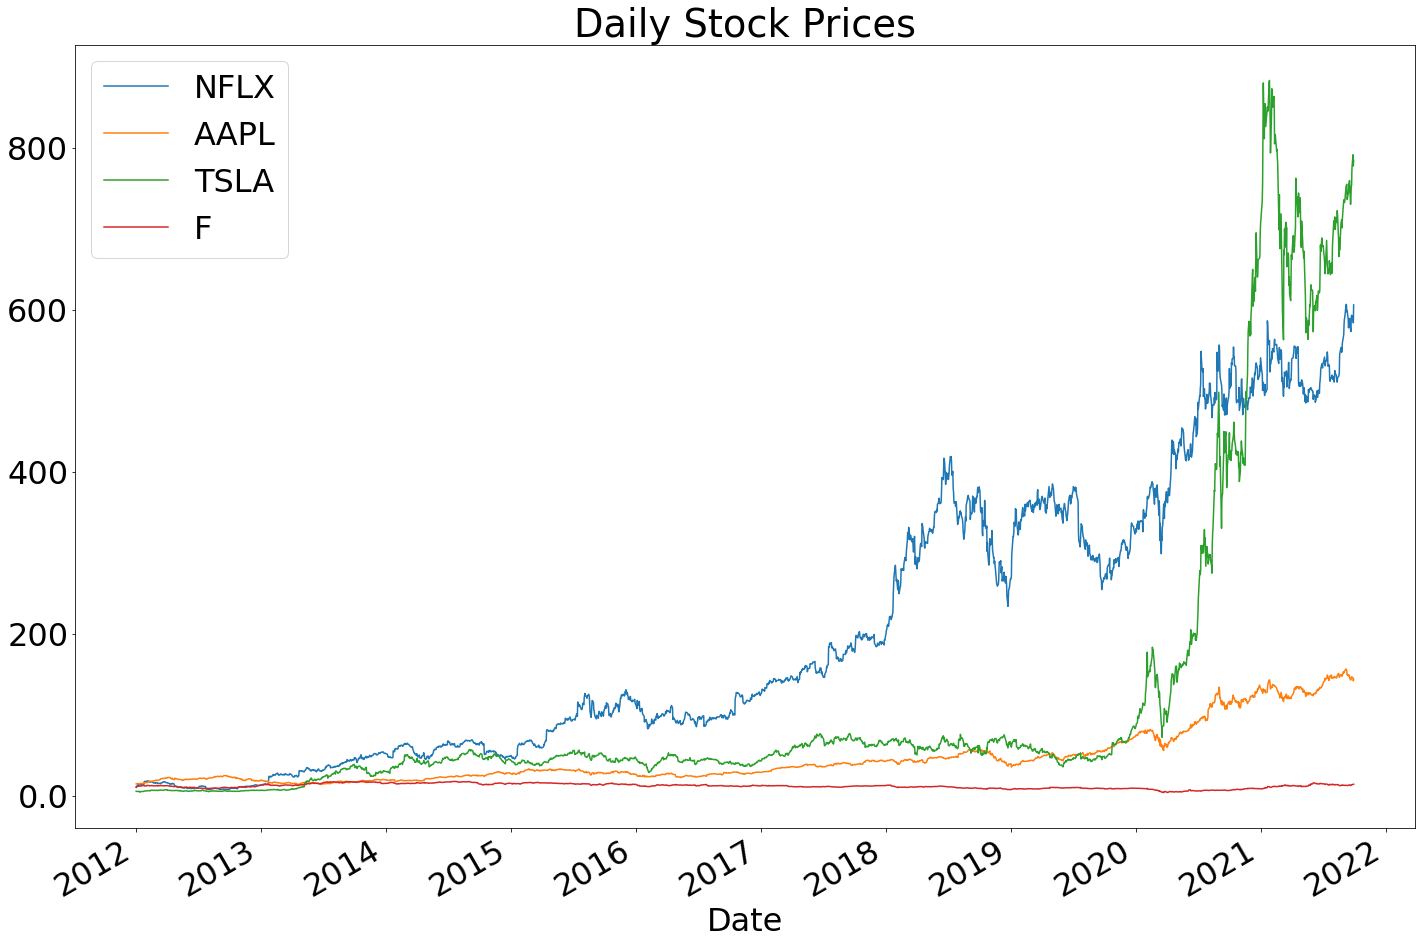

In [17]:
import matplotlib.pyplot as plt         # import matplotlib library 

# set default font size
plt.rcParams.update({'font.size': 32})    
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
# set y axis as logged to view changes in proportional terms
# instead of absolute terms
# reset y labels to integer from scientific notation
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

This is a useful visualization, as it shows that tesla and netflix have grown extremely rapidy, while aaple's growth has been more steady and ford's growth has been dissapointing. 

Another possibly more useful visulaization could be the marketcap for each company over time, because someone seeing just the price graphic may not realize that aaple is worth much  more than any of the other companies, they are just split into way more shares. 

For the purposes of our model, it may be more useful for us to see how various metrics of a stock changed with the price. Again, for a computer this comparison would be creating a multiple linear regression model that sees how one day/month/year's change in a metric effects the price of a stock for the next day/month/year. For now though, we just want to get a feel for what metrics might cause changes in price just by looking at them. 

It may be useful to graph a stocks price, and other metrics, lets do volume, and we will visually see how they both changed. 
Since Ford has done so poorly, maybe we can glean insights into what went wrong by looking at how their volume changed. 

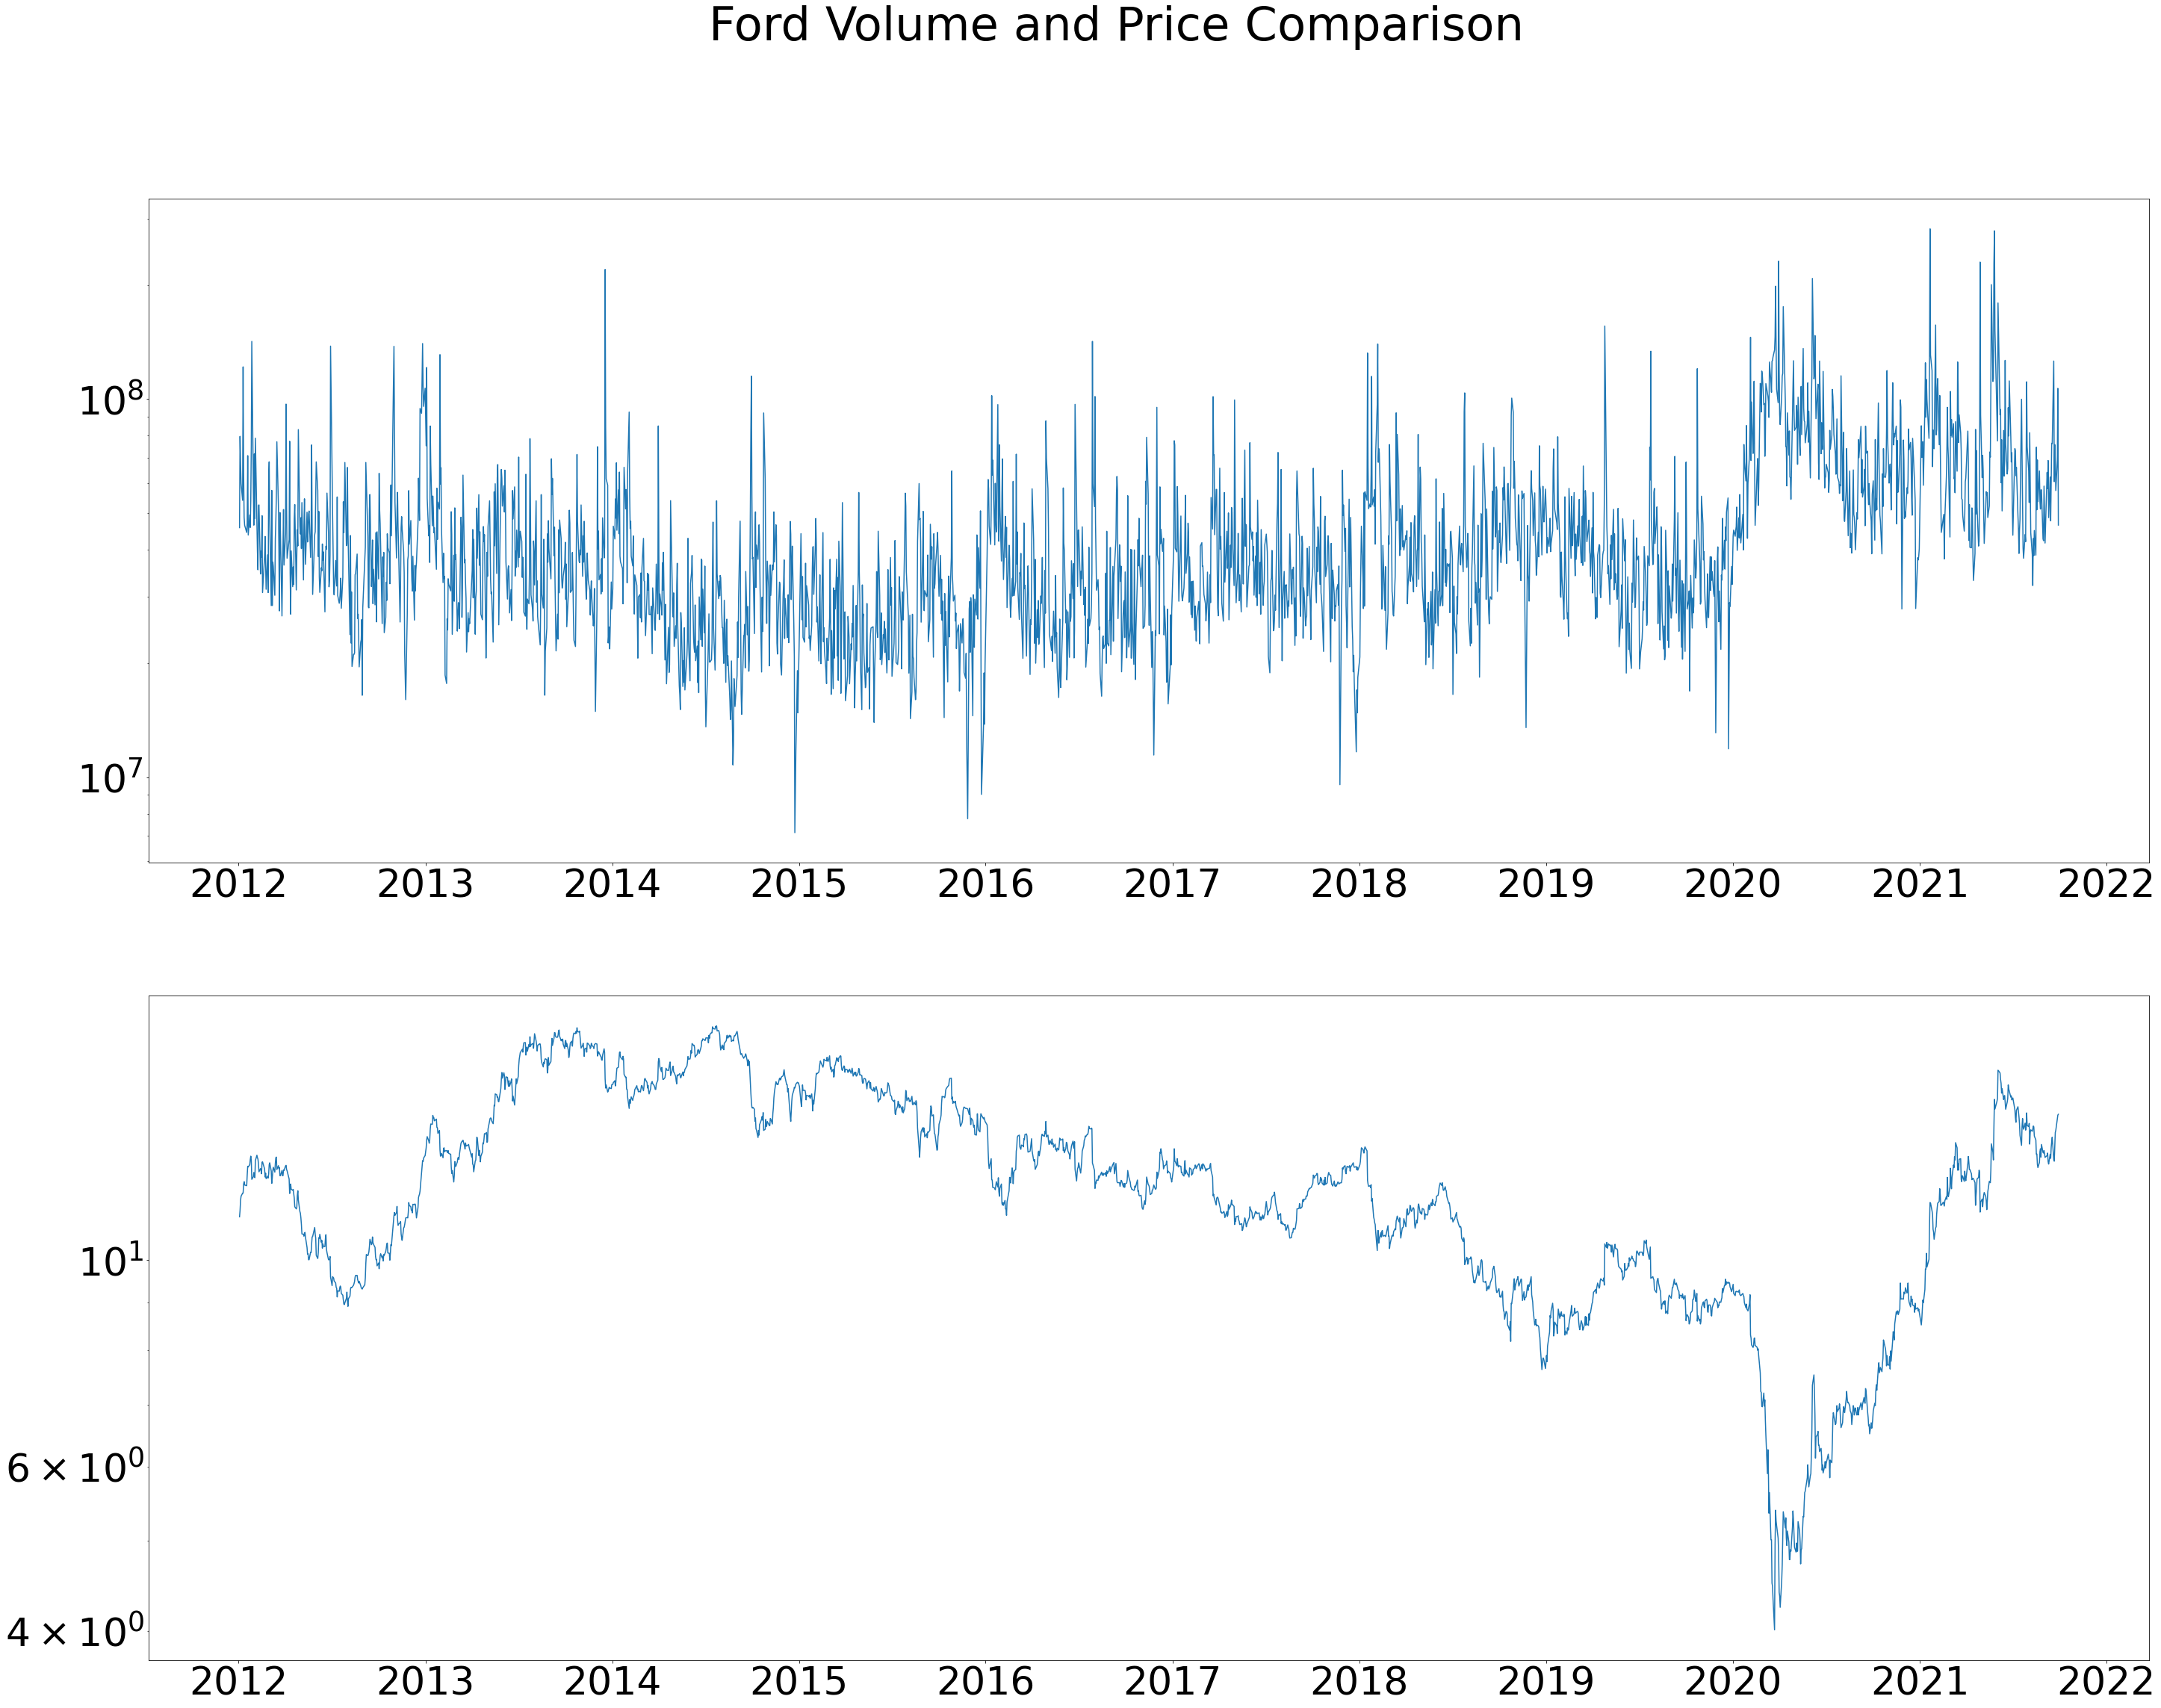

In [72]:
f_volume = stock_dict["F"]['Volume']
f_price = stock_dict['F']['Close']

ford_volume = pd.DataFrame(f_volume)
ford_price = pd.DataFrame(f_price)
plt.rcParams.update({'font.size': 52})
fig, axs = plt.subplots(2, figsize = (48,36))
fig.suptitle('Ford Volume and Price Comparison')
axs[0].plot(ford_volume)
axs[1].plot(ford_price)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
  


plt.show()
plt.close()

Honestly, this visualization isnt amazing. Luckily the computer will have a much easier time correlating changes in these two variables than our naked eye is having. We can see some trends, I suppose. The small price raise of 2013 for Ford was followed by a slight dip in volume, which stayed relatively low as the price of Ford dropped in the following 7 years. In 2020, there was a big dip in the price, which seems to have happened at the same time as there was a spike in volume. If we looked at many more of these comparisons and saw that a sharp dip in price was often accompanied by a spike in volume, we might conclude that a spike in volume means we should not buy a stock or pull out of a stock we are already in. This is how the computer will build our model. lets try again with tesla for fun. 

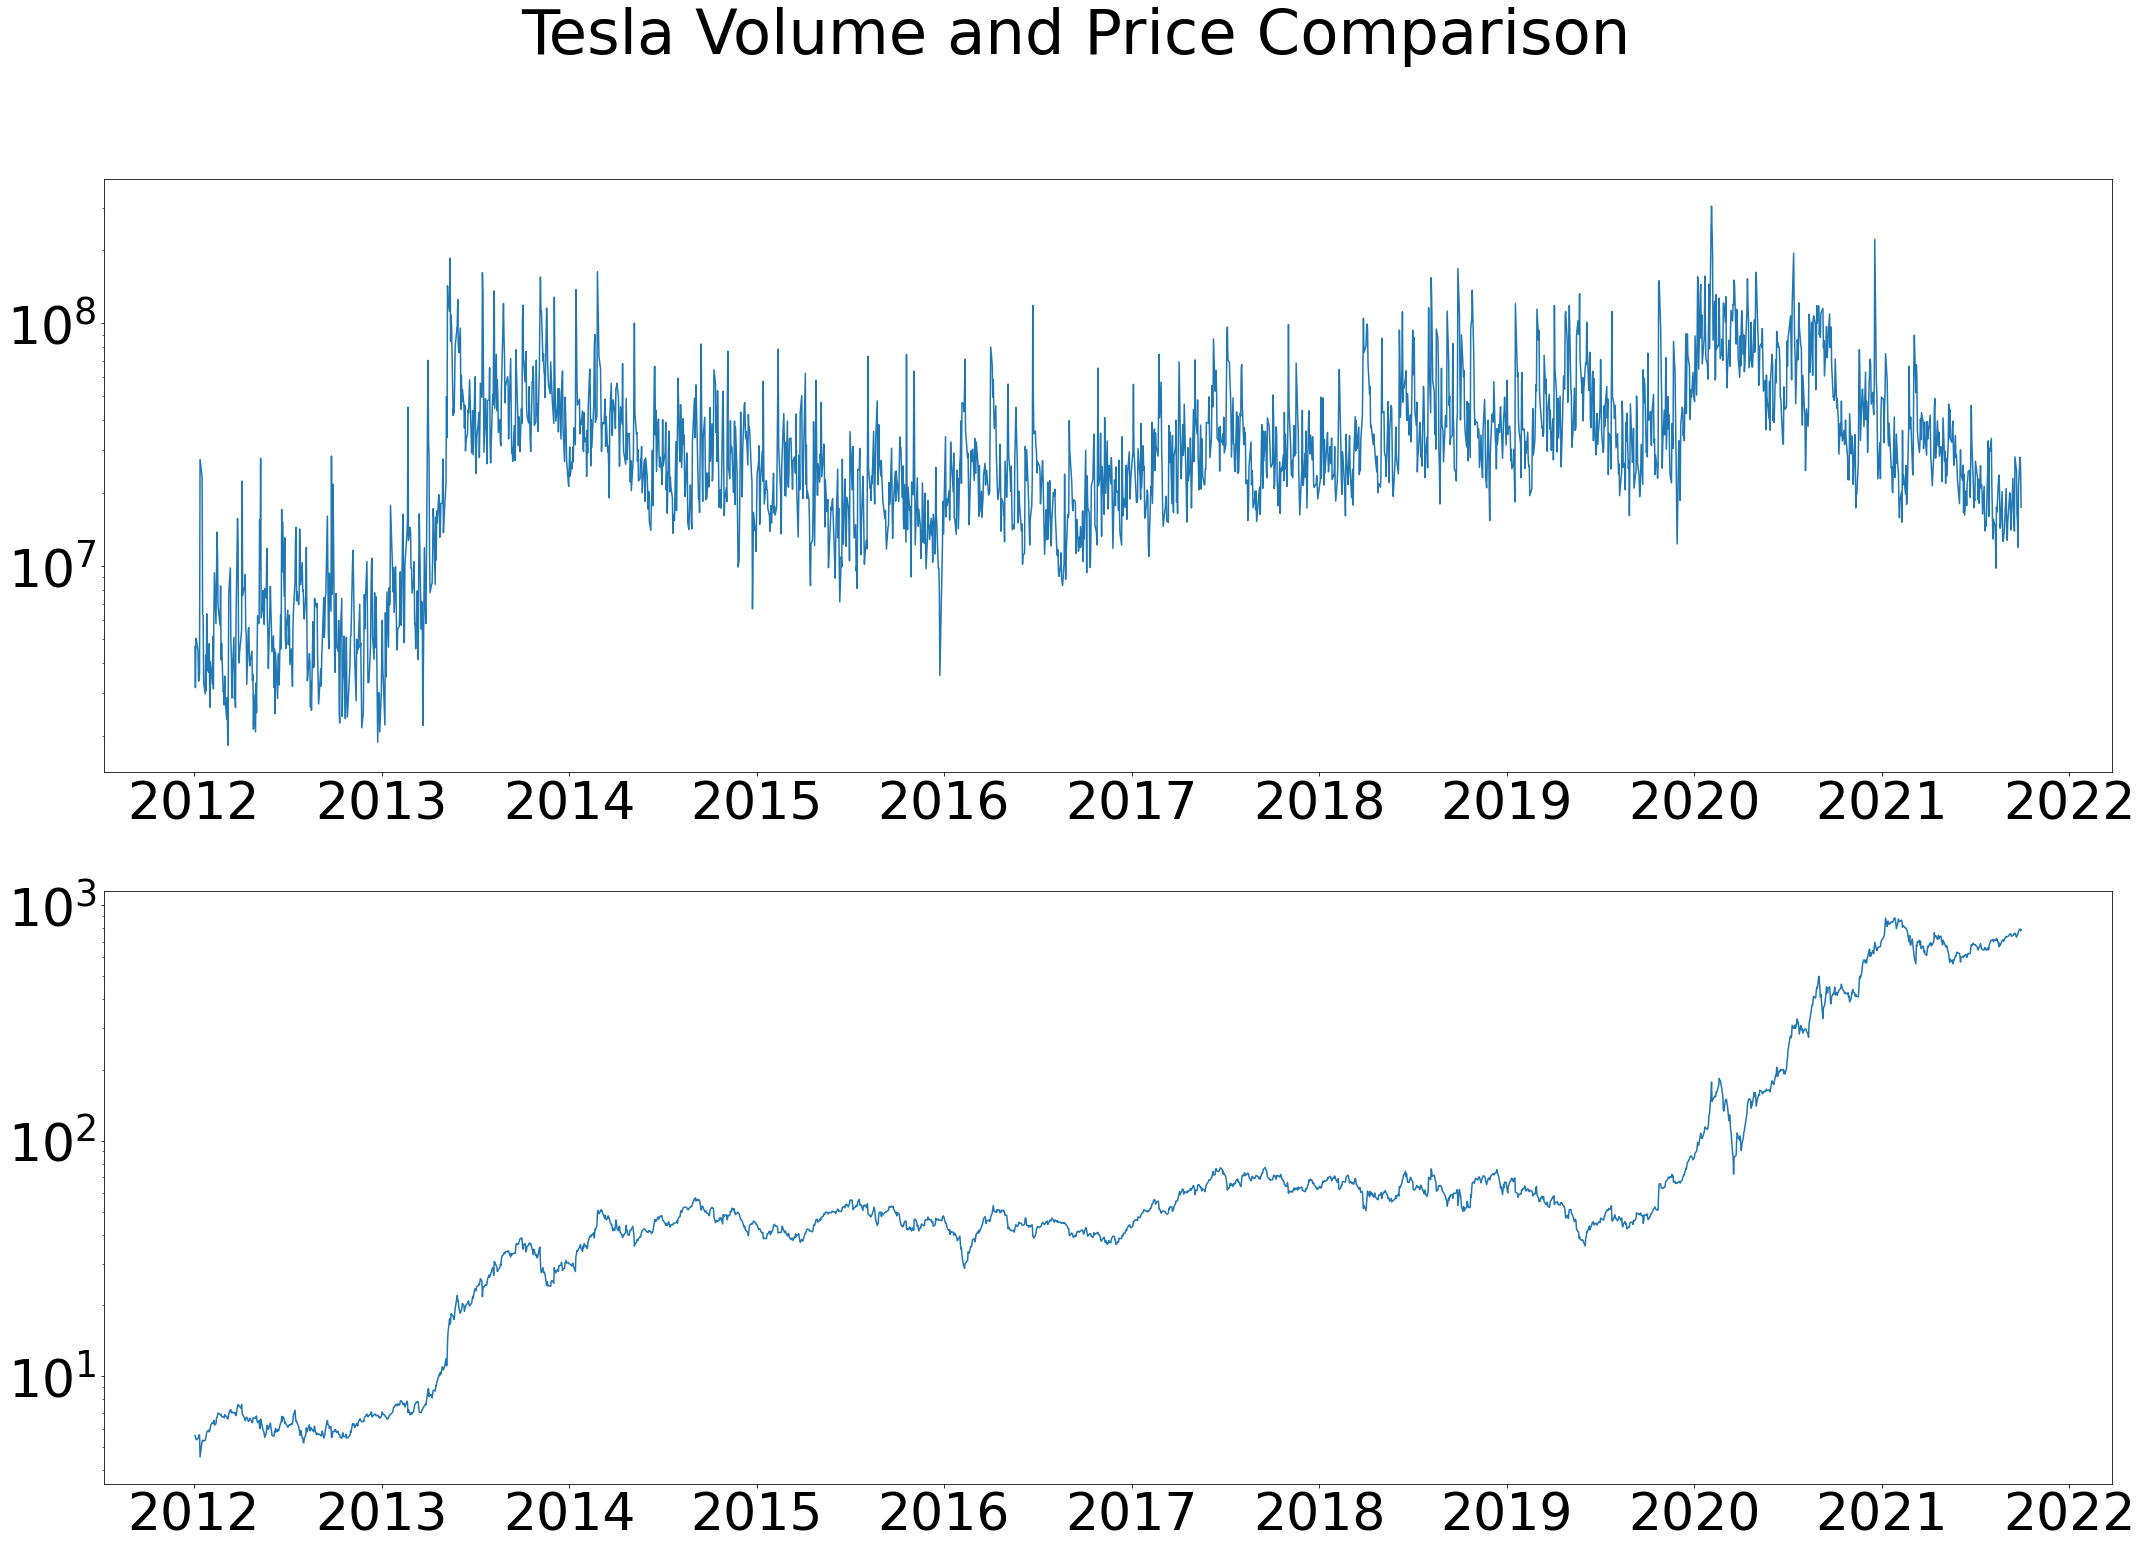

In [103]:
t_volume = stock_dict["TSLA"]['Volume']
t_price = stock_dict['TSLA']['Close']

tesla_volume = pd.DataFrame(t_volume)
tesla_price = pd.DataFrame(t_price)
plt.rcParams.update({'font.size': 52})
fig, axs = plt.subplots(2, figsize = (36,24))


fig.suptitle('Tesla Volume and Price Comparison')
axs[0].plot(tesla_volume)
axs[1].plot(tesla_price)
axs[0].set_yscale('log')
axs[1].set_yscale('log')
  


plt.show()
plt.close()

So tesla had a massive volume spike in 2013/14, and its price increased proportionately. Increases in demand increase price, right? One might always expect this to be true. But we can see that from 2020 and beyond, the price has continued to rise while volume has dropped. Maybe this means that less 'daytraders' or folks looking to buy and sell the stock many times for a profit are trading Tesla less often than they were. Who knows. Again, these visualizations are useful, but by no means do the do a good job of integrating multiple variables into an analysis of how price changes. For that model, we will need to harness the power of stats and computation, which we will do next. 